# See tachometric curves to decide Sensory delay

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

# data

In [15]:
og_df = pd.read_csv('../out_LED.csv')
df = og_df[ og_df['repeat_trial'].isin([0,2]) | og_df['repeat_trial'].isna() ]
session_type = 7    
df = df[ df['session_type'].isin([session_type]) ]
training_level = 16
df = df[ df['training_level'].isin([training_level]) ]

# drop rows from df where intended_fix, LED_onset_time and timed_fix are nan
df = df.dropna(subset=['intended_fix', 'LED_onset_time', 'timed_fix'])

In [21]:
# LED OFF Trials

df = df[  df['LED_trial'] == 0 ]

# 1 is right , -1 is left
# df['choice'] = df['response_poke'].apply(lambda x: 1 if x == 3 else (-1 if x == 2 else 0))
# df['choice'] = df['response_poke'].apply(lambda x: 1 if x == 3 else (-1 if x == 2 else 0))

df['choice'] = df['response_poke'].apply(lambda x: 1 if x == 3 else (-1 if x == 2 else random.choice([1, -1])))
df['choice_0'] = df['response_poke'].apply(lambda x: 1 if x == 3 else (-1 if x == 2 else 0))


# 1 or 0 if the choice was correct or not
df['correct'] = (df['ILD'] * df['choice']).apply(lambda x: 1 if x > 0 else 0)

In [18]:
bw = 0.01
bins = np.arange(0, 9, bw)

df['RT_bin'] = pd.cut(df['timed_fix'], bins=bins, include_lowest=True)
grouped_by_rt_bin = df.groupby('RT_bin', observed=False)['correct'].agg(['mean', 'count'])
grouped_by_rt_bin['bin_mid'] = grouped_by_rt_bin.index.map(lambda x: x.mid)


In [24]:
# Count the number of rows where 'choice_0' is 0 in each bin
grouped_by_rt_bin['choice_0_zero_count'] = df.groupby('RT_bin', observed=False)['choice_0'].apply(lambda x: (x == 0).sum())

# Display the updated grouped_by_rt_bin DataFrame
print(grouped_by_rt_bin)


                    mean  count bin_mid  choice_0_zero_count
RT_bin                                                      
(-0.001, 0.01]  0.613636     44  0.0045                   44
(0.01, 0.02]    0.563830     94  0.0150                   94
(0.02, 0.03]    0.452381     84  0.0250                   84
(0.03, 0.04]    0.626374     91  0.0350                   91
(0.04, 0.05]    0.500000    138  0.0450                  138
...                  ...    ...     ...                  ...
(8.94, 8.95]         NaN      0  8.9450                    0
(8.95, 8.96]         NaN      0  8.9550                    0
(8.96, 8.97]         NaN      0  8.9650                    0
(8.97, 8.98]         NaN      0  8.9750                    0
(8.98, 8.99]         NaN      0  8.9850                    0

[899 rows x 4 columns]


Text(0.5, 1.0, 'frac of aborts = 0.01')

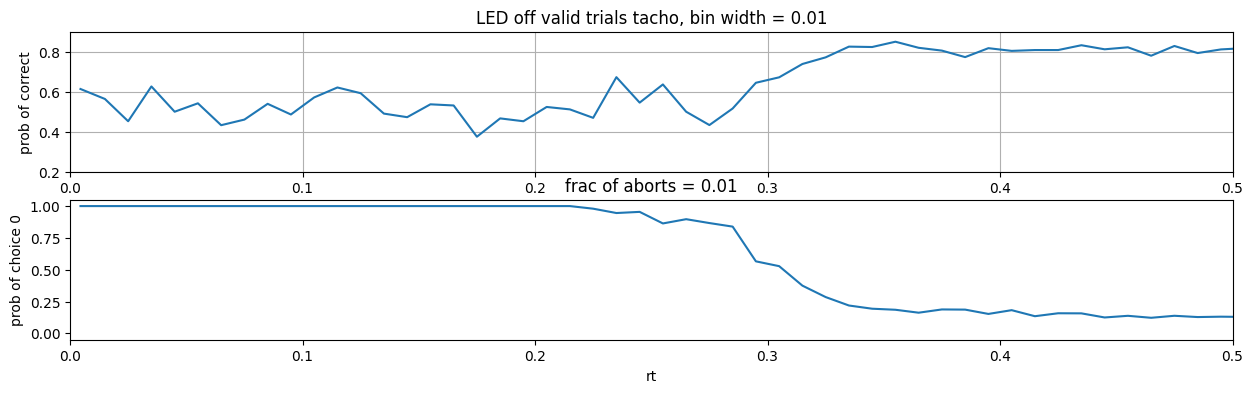

In [29]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
plt.plot(grouped_by_rt_bin['bin_mid'], grouped_by_rt_bin['mean'])

plt.xlim(0,0.5)
plt.xlabel('rt')
plt.ylabel('prob of correct')
plt.title(f'LED off valid trials tacho, bin width = {bw}')
plt.grid()
plt.ylim(0.2, 0.9)

plt.subplot(2,1,2)
plt.plot(grouped_by_rt_bin['bin_mid'], grouped_by_rt_bin['choice_0_zero_count']/grouped_by_rt_bin['count'])
plt.xlim(0,0.5)
plt.xlabel('rt')
plt.ylabel('prob of choice 0')
plt.title(f'frac of aborts = {bw}')

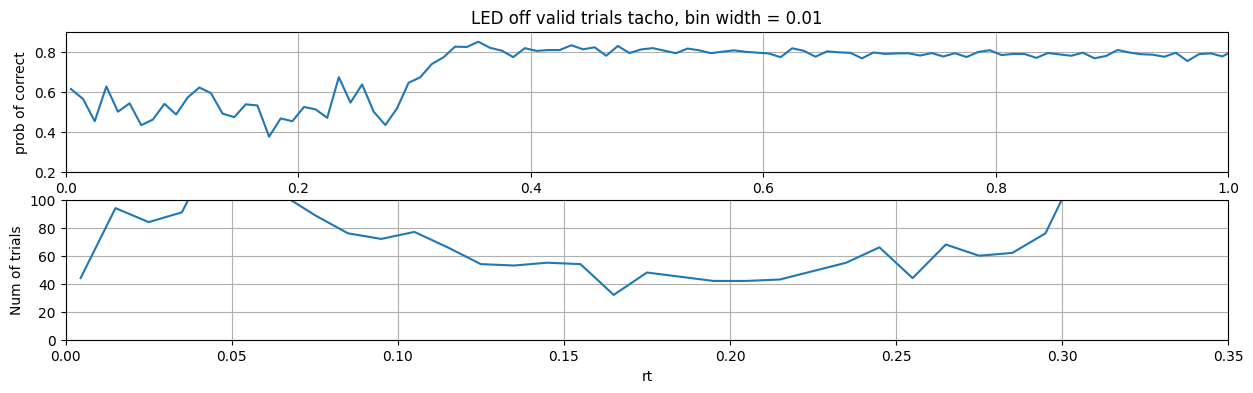

In [23]:
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
plt.plot(grouped_by_rt_bin['bin_mid'], grouped_by_rt_bin['mean'])

plt.xlim(0,1)
plt.xlabel('rt')
plt.ylabel('prob of correct')
plt.title(f'LED off valid trials tacho, bin width = {bw}')
plt.grid()
plt.ylim(0.2, 0.9)
# xticks= np.arange(0.15,1.5,0.05)
# plt.xticks(xticks)

plt.subplot(2,1,2)
plt.plot(grouped_by_rt_bin['bin_mid'], grouped_by_rt_bin['count'])
plt.xlim(0,0.35)
plt.xlabel('rt')
plt.ylabel('Num of trials')
plt.ylim(0,100)
plt.grid()